# Lecture 35: Evolutionary Computation

```{note}
Up until now, we have explored local search-based metahueristics, in this and next lecture, we will look into some of the population-based heuristics that explore and exploit the solution landscape with multiple candidate solutions.
```
---

## Overview

Inspired from the biological process of natural evolution, the Evolutionary Computation algorithm takes a population of solutions and then iteratively evolves the population through  parent selection, crossover, mutation, and natural selection operations to find high-quality solutions. Specifically, it begins with an initial population of solutions – $s_o$, and consequently sets the current solution – $s$, and global best solution – $s^*$, both, to the local best solution from this initial population. Hereafter, in each iteration, the algorithm 1) selects $\mu$ parent solutions using parent selection method – $\text{PM}$, then, 2) generates $\lambda$ offspring solutions from the selected parent solutions using crossover method – $\text{CM}$, that combines $\rho$ parent solutions to generate one offspring solution, 3) mutates offspring solutions using mutation method – $\text{MM}$, with a small probability $\epsilon$, and finally 4) performs natural selection to generate a new population of solutions (from the current population of solutions as well as their offspring solutions) using selection method – $\text{NM}$, accounting for diversity criteria – $\sigma$. Hereafter, the algorithm updates the current solution and the global best solution. Specifically, the algorithm sets the current solution to the local best solution regardless of their objective function evaluations – $f$. However, as the name suggests, the global best solution is only set to the local best solution if the latter is better than the former. This iterative process of search evolution continues until the algorithm achieves a threshold level of solution quality or computational effort. Upon convergence, the algorithm returns the global best solution.

Note, the evolutionary operations in this algorithm – parent selection, crossover, mutation, and natural selection – are mathematical functions that emulate the respective natural evolution processes. For instance, the parent selection method utilises strategies such as tournament selection, roulette wheel selection, or rank-based selection, to stochastically select solutions based on their objective function evaluation as parent solutions for the next generation. The crossover method then combines distinct features (decision variable values) from parent solutions to generate the offspring solution. Subsequently, the mutation method introduces random changes to the offspring solutions by altering or adding noise to specific features. Finally, the natural selection method may emulate survival of the fittest using truncation or elitist mechanisms; or promote population diversity through use of crowding and sharing mechanisms. Together, these evolutionary operations enable the algorithm to exploit the solution landscape to intensify the search as well as explore the solution landscape to diversify the search. This use of evolutionary operations on a population of solutions to search for high-quality solutions thus makes Evolutionary Computation a very robust algorithm. Nonetheless, the success of this algorithm is contingent on deliberate selection of evolutionary operations ($\text{PM}$, $\text{CM}$, $\text{MM}$, $\text{NM}$) and precise fine-tuning of evolutionary parameters ($\mu$, $\lambda$, $\rho$, $\epsilon$, $\sigma$), tailored to the specific problem at hand.

The discussion here provides a general description of the Evolutionary Computation algorithm – a broad term that encompasses Evolutionary Strategies, Genetic Algorithm, Genetic Programming, and Evolutionary Programming. In practice, the exact algorithm implementation and associated semantics are contingent on the nature of the problem and characteristics of the solution domain space. For instance, real-valued continuous optimisation problems employ Evolutionary Strategies which are particularly suited to fine-tune continuous variables. However, combinatorial optimisation problems, wherein the objective is to find an optimal combination (arrangement, sequence, or order) of elements, necessitate the use of Genetic Algorithms that encode the solution as a string of elements (chromosomes). On the other hand, structural design problems develop an optimal hierarchical configuration of elements through Genetic Programming that models solution as a tree, where nodes represent information, and branches represent relationship between them. While problems that aim emulate optimal system behaviour utilise Evolutionary Programming with solutions represented as candidate strategies, finite state machines, or stochastic models to facilitate adaptive behaviour. 

Considering the extensive nature of Evolutionary Computation algorithms to address diverse range of problems, it has found immense success in optimising parking systems, vehicle navigation systems, transit timetabling and scheduling, dial-a-ride problem, vehicle routing problem, traffic signals, and traffic assignment problem, listed in increasing order of problem scope.


---

## Pseudo Code

1. **Procedure** $\text{EC}(s_o, ((\text{SM}, \mu), (\text{CM}, \lambda, \rho), (\text{MM}, \epsilon), (\text{NM}, \sigma)))$
2. $\boldsymbol{s} ← \boldsymbol{s_o}$ &emsp;<small>// initialise the current population $\boldsymbol{s}$ to the initial population $\boldsymbol{s_o}$</small>
3. $s ← \text{argmin} \{f(s); s ∈ \boldsymbol{s}\}$ &emsp;<small>// find the local best solution in the current population</small>
4. $s^* ← s$ &emsp;<small>// set the global best solution $s^*$ to the local best solution</small>
5. **while** $!\text{converged}$ **do** &emsp;<small>// repeat until converged</small>
6. &emsp;$\boldsymbol{s_p} ← \text{SM}(\boldsymbol{s}, \mu)$ &emsp;<small>// select $\mu$ parent solutions from the current population using selection method $\text{SM}$</small>
7. &emsp;$\boldsymbol{s_c} ← \text{CM}(\boldsymbol{s_p}, \lambda, \rho)$ &emsp;<small>// with $\rho$ parents procreating one offspring, generate $\lambda$ offspring solutions using crossover method $\text{CM}$</small>
8. &emsp;$\boldsymbol{s_c} ← \text{MM}(\boldsymbol{s_c}, \epsilon)$ &emsp;<small>// mutate selected offspring solutions using mutation method $\text{MM}$ with a small probability $\epsilon$</small>
9. &emsp;$\boldsymbol{s} ← \text{NM}(\boldsymbol{s} ∪ \boldsymbol{s_c}, \sigma)$ &emsp;<small>// perform natural selection on the current population and their offsprings using natural selection method $\text{NM}$, accounting for diversity criteria $\sigma$</small>
10. &emsp;$s ← \text{argmin} \{f(s); s ∈ \boldsymbol{s}\}$ &emsp;<small>// find the local best solution from the current population</small>
11. &emsp;**if** $f(s) < f(s^*)$ **then** &emsp;<small>// if the local best solution is better than the global best solution</small>
12. &emsp;&emsp;$s^* ← s$ &emsp;<small>// update the global best solution to the local best solution</small>
13. &emsp;**end if**
14. **end while**
15. **return** $s^*$ &emsp;<small>// return the best solution</small>

---

## Implementation

In [227]:
import copy
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def ga(S_o, SM, u, CM, l, p, MM, e, NM, m, n=1000, t=1e-5):
    """
    Genetic Algorithm

    Parameters:
    - S_o: Initial population
    - f: Fitness function
    - SM: Selection method
    - u: number of parents
    - CM: Crossover method
    - l: number of children
    - p: parents per child
    - MM: Mutation method
    - e: mutation probability
    - NM: Natural selection method
    - m: diversity parameter
    - n: Maximum number of generations
    - t: Convergence threshold (based on improvement)
    
    Returns:
    - S_b: List of best solutions over iterations
    """
    
    S   = S_o                                   # Current solution
    s_b = S[np.argmin([f(s) for s in S])]       # Best solution found
    S_b = [s_b]                                 # Track best solutions over iterations
    
    i = 1
    r = float('inf')
    converged = False
    while not converged:
        # 1. Selection
        S_p = SM(S, u)

        # 2. Crossover
        S_c = CM(S_p, l, p)

        # 3. Mutation
        S_c = MM(S_c, e)

        # 4. Natural Selection
        S   = NM(S + S_c, m)

        # 5. Update best solution
        s_p = S[np.argmin([f(s) for s in S])]
        if f(s_p) < f(s_b):
            r   = f(s_b) - f(s_p)
            s_b = s_p

        S_b.append(s_b)

        i += 1
        if i >= n or r <= t:                    # Convergence condition
          converged = True

    return S_b

---

## Case Study

### Ackley Function

Text(0.5, 0.92, 'Ackley Function Surface Plot')

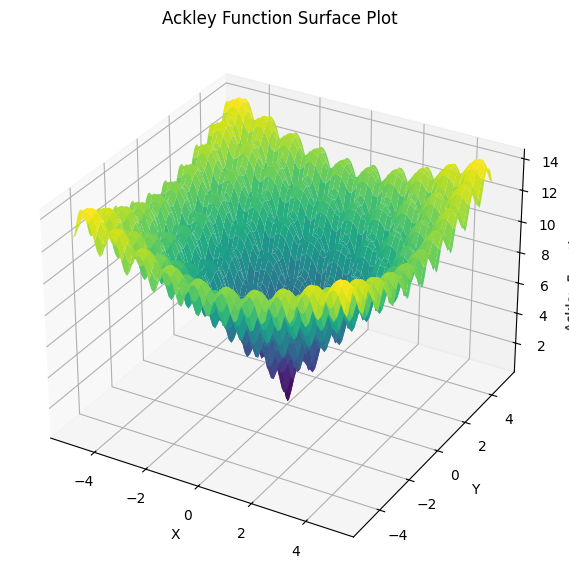

In [ ]:
def f(s):
 """
 Computes the Ackley function for given solution s.

 Parameters:
 - s: Tuple of input coordinates

 Returns:
 - Function value at s
 """
 x, y = s
 return -20 * np.exp(-0.2 * np.sqrt((x**2 + y**2) / 2)) + -np.exp((np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)) / 2) + 20 + np.exp(1)

# Generate a grid of (x, y) values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([[f(s) for s in zip(r, c)] for r, c in zip(X, Y)])

# Plot the Ackley function
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Ackley Function Value")
ax.set_title("Ackley Function Surface Plot")

In [268]:
# Selection Operator
def SM(S, u):
    S_p = []
    F   = [1.0/(1.0 + f(s)) for s in S]
    W   = F / sum(F)
    for _ in range(u):
        r = random.random()
        z = 0.0
        for s, w in zip(S, W):
            z += w
            if z >= r:
                S_p.append(copy.deepcopy(s))
                break
    return S_p

# Crossover Operator
def CM(S, l, p):
    S_c = []
    for _ in range(l):
        S_p = random.sample(S, p)
        F   = [1/ (1 + f(s)) for s in S_p]
        W   = F / sum(F)
        s   = [sum(w * s[0] for w, s in zip(W, S_p)), sum(w * s[1] for w, s in zip(W, S_p))]
        S_c.append(copy.deepcopy(s))
    return S_c

# Mutation Operator
def MM(S_c, e):
    for s in S_c:
        if random.random() < e:
            s[0] += random.gauss(0, 0.1)
            s[1] += random.gauss(0, 0.1)
    return S_c

# Natural Selection Operator
def NM(S, m):
    assert 0 <= m <= 1
    F  = np.array([1/(1 + f(s)) for s in S])
    W  = F ** (1 - m)
    P  = W / np.sum(W)
    I = np.random.choice(len(S), size=len(S_o), replace=False, p=P)
    S_n = [copy.deepcopy(S[i]) for i in I]
    return S_n

Best solution: [np.float64(-0.004128745265227676), np.float64(-0.01451034478086268)]
Objective function value: 0.04872029625382668


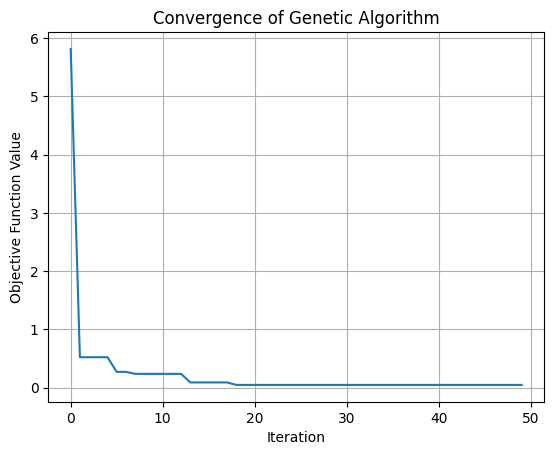

In [291]:
S_o = [[random.uniform(-5, 5), random.uniform(-5, 5)] for _ in range(25)]
S   = ga(S_o, SM, 10, CM, 20, 2, MM, 0.05, NM, 0.3, n=50, t=1e-15)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Genetic Algorithm")
plt.grid()
plt.show()

---

## Research

1. Genetic Algorithm (GA)
Inspired by biological genetics and natural selection, a Genetic Algorithm starts with a population of candidate solutions (often encoded as strings, or “chromosomes”). These solutions evolve through operators analogous to crossover, mutation, and selection. At each iteration (generation), fitter solutions are preferentially chosen to reproduce, yielding ever-improving offspring until the best solution is identified.

2. Evolutionary Strategies (ES)
Evolutionary Strategies rely on real-valued vectors to represent candidate solutions and emphasize mutation as the primary search operator. Strategies also maintain self-adapting mutation parameters (e.g., step sizes), allowing the algorithm to fine-tune how strongly or weakly it explores the solution space. Selection typically favors individuals with higher fitness, driving the population toward optimal solutions.

3. Evolutionary Programming (EP)
In Evolutionary Programming, candidate solutions are often modeled as finite state machines (or other representations), focusing on mutation as the chief evolutionary operator. Selection often uses a tournament or probabilistic mechanism. While reminiscent of Genetic Algorithms, EP discards crossover, emphasizing a strongly mutation-centric adaptation to refine solutions over successive generations.

4. Genetic Programming (GP)
Genetic Programming evolves computer programs or symbolic expressions (rather than fixed-size data structures) to solve problems. Each candidate solution is a tree structure (representing program instructions or operations) that undergoes crossover and mutation. Over time, fitter programs emerge, effectively “learning” behaviors or symbolic rules to address complex tasks such as function discovery or data classification.

5. Differential Evolution (DE)
Differential Evolution is particularly popular for continuous parameter optimization. It keeps a population of real-valued parameter vectors and generates new candidate solutions by combining existing vectors (e.g., by subtracting and adding them) and then mutating the results slightly. A “greedy” selection mechanism picks between parent and offspring, ensuring that each generation is at least as fit as the previous one.

6. Cultural Algorithm (CA)
Cultural Algorithms maintain a population of solutions alongside a “belief space” that stores accumulated problem-solving knowledge (e.g., constraints, best parameter ranges). The belief space influences how offspring are generated (by guiding mutation or crossover). It is updated every generation based on the successes (and failures) of newly evolved individuals, thus embedding a learning mechanism into the evolutionary cycle.

7. Co-evolutionary Algorithms
Co-evolutionary methods involve multiple populations evolving in tandem, where each population’s fitness is influenced by interactions with other populations or sub-problems. This mimics predator-prey or host-parasite dynamics in nature. A co-evolutionary setup can lead to arms races or synergistic improvements, encouraging more sophisticated solutions to emerge.

8. Memetic Algorithms (MAs)
Memetic Algorithms blend global evolutionary search (e.g., Genetic Algorithms) with local refinement procedures (often called local search or “hill-climbing”). This two-tier approach—global exploration and local exploitation—helps to quickly home in on high-quality solutions, particularly for large or complex optimization problems.